In [32]:
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import importlib
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from scipy import ndimage

In [19]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import cardiac_region
importlib.reload(cardiac_region)
import cardiac_region as c

In [40]:
especimens = [
    "20190504_E1",
    "20190404_E2",
    "20190520_E4",
    "20190516_E3",
    "20190806_E3",
    "20190520_E2",
    "20190401_E3",
    "20190517_E1",
    "20190520_E1",
    "20190401_E1",
]

In [26]:
ESPECIMEN = "20190517_E1"
nuclei  =f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5.nii.gz"
mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/MGFP/{ESPECIMEN}_mGFP_decon_0.5.nii.gz_DAPI_decon_0.5.nii.gz"


In [6]:
DAPI = nib.load(nuclei).get_fdata() 
DAPI = DAPI[:,:,:,0]
DAPI.shape

(1024, 1024, 563)

In [7]:
MEM = nib.load(mem).get_fdata() 
MEM = MEM[:,:,:,0]
MEM.shape

(1024, 1024, 563)

In [27]:
pred_mem = nib.load(gasp_mem).get_fdata()
pred_mem.shape

(1024, 1024, 563)

In [ ]:
mask_seg_mem = np.where(pred_mem != 0, True, False)

In [37]:
mask_nuclei = mask_seg_mem * DAPI

In [ ]:
c.saveNifti(mask_nuclei, {"x_res":0,"y_res":0, "z_res":0}, 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5_maskmesoderm.nii.gz")

In [38]:
nuclei

'/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/20190517_E1_DAPI_decon_0.5.nii.gz'

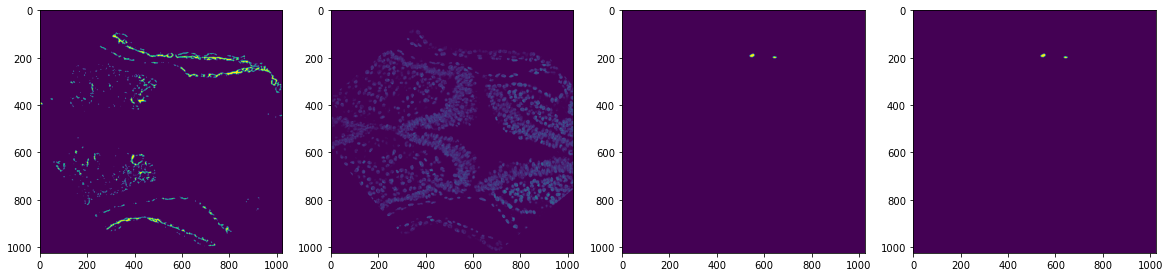

In [34]:
for t in range(56):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [mask_mem[:,:,n], DAPI[:,:,n], mask_seg_mem[:,:,n], mask_seg_memfill[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [41]:

for ESPECIMEN in especimens:
    print(ESPECIMEN)
    nuclei  =f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5.nii.gz"
    mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/MGFP/{ESPECIMEN}_mGFP_decon_0.5.nii.gz"
    gasp_mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/{ESPECIMEN}_mGFP_XYZ_predictions_GASP.nii.gz"
    DAPI = nib.load(nuclei).get_fdata() 
    DAPI = DAPI[:,:,:,0]
    MEM = nib.load(mem).get_fdata() 
    MEM = MEM[:,:,:,0]
    pred_mem = nib.load(gasp_mem).get_fdata()
    mask_seg_mem = np.where(pred_mem != 0, True, False)
    mask_nuclei = mask_seg_mem * DAPI
    c.saveNifti(mask_nuclei, {"x_res":0,"y_res":0, "z_res":0}, 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5_maskmesoderm.nii.gz")
    print("--------------")

20190504_E1
--------------
20190404_E2
--------------
20190520_E4
--------------
20190516_E3
--------------
20190806_E3
--------------
20190520_E2
--------------
20190401_E3
--------------
20190517_E1
--------------
20190520_E1
--------------
20190401_E1
--------------
